### Pre-processing of metagenomes

Here is where you should include all the pre-processing you did on your data before it hit sourmash.

pear -y 8G -j 2 -p 0.05 -g 2 -f XXX.R1.fastq.gz -r XXX.R2.fastq.gz -o XXX_1.fastq 

fastq-to-fasta.py

normalize-by-median.py -k 21 -M 8e9 --cutoff=20 XXX_1.fasta 



### Sourmash command line
sourmash compute -k 31 -n 1000 -f XXX_1.fasta 

sourmash compare -k 31 cmp *.sig

all .sig files are in a single folder

juypter notebook places in folder with all .sig files

In [1]:
%matplotlib inline
import numpy
import scipy
import pylab
import scipy.cluster.hierarchy as sch
import yaml

In [16]:
# This code is from @ctb on github avialable here:
# https://github.com/dib-lab/sourmash

def load_matrix_and_labels(basefile):
    D = numpy.load(open(basefile, 'rb'))
    labeltext = [ x.strip() for x in open(basefile + '.labels.txt') ]
    return (D, labeltext)

def plot_composite_matrix(D, labeltext, show_labels=True, show_indices=True):
    if show_labels:
        show_indices=True
    D = numpy.array(D, copy=True)

    fig = pylab.figure(figsize=(11,8))
    ax1 = fig.add_axes([0.09,0.1,0.2,0.6])

    # plot denderogram
    Y = sch.linkage(D, method='single') # centroid  
    
    dendrolabels = labeltext
    if not show_labels:
        dendrolabels = [ str(i) for i in range(len(labeltext)) ]
                        
    Z1 = sch.dendrogram(Y, orientation='right', labels=dendrolabels,
                        no_labels=not show_indices)
    ax1.set_xticks([])

    xstart = 0.45
    width = 0.45
    if not show_labels:
        xstart = 0.315
    scale_xstart = xstart + width + 0.01

    # plot matrix
    axmatrix = fig.add_axes([xstart,0.1, width,0.6])

    # (this reorders D by the clustering in Z1)
    idx1 = Z1['leaves']
    D = D[idx1, :]
    D = D[:, idx1]

    # show matrix
    im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu, vmin=0, vmax=1)
    axmatrix.set_xticks([])
    axmatrix.set_yticks([])

    # Plot colorbar.                                                            
    axcolor = fig.add_axes([scale_xstart,0.1,0.02,0.6])
    pylab.colorbar(im, cax=axcolor)
    
    # print labels, if not shown
    if not show_labels:
        for i, label in enumerate(labeltext):
            print('%d\t%s' % (i, label))

    return fig

You will either need to run this notebook in the folder with all the signatures or point the D_filename to the folder containing the output from !sourmash compute

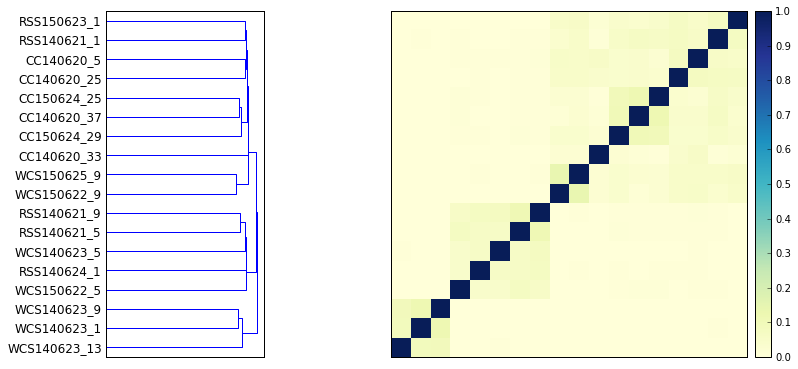

In [17]:
D_filename = 'cmp'

D, labeltext = load_matrix_and_labels(D_filename)

fig = plot_composite_matrix(D, labeltext)

pylab.savefig('sourmash-by_file_id.pdf', bbox_inches='tight')

In [18]:
metadata1 = [ x.strip() for x in open('cmp.labels2.txt') ]

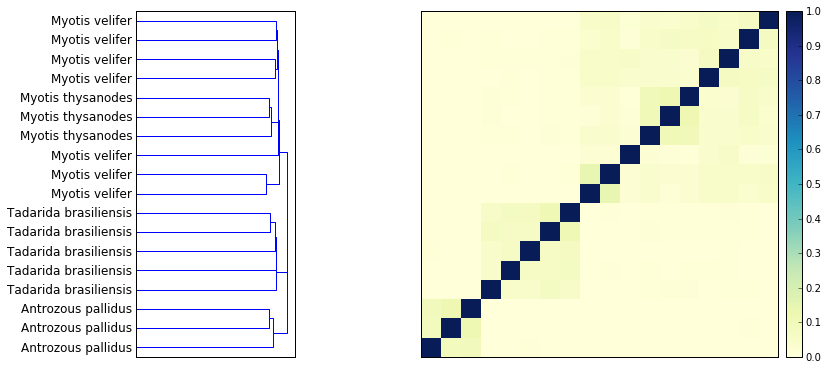

In [19]:
fig = plot_composite_matrix(D, metadata1)

pylab.savefig('sourmash-by-metadata1.pdf', bbox_inches='tight')

In [20]:
metadata2 = [ x.strip() for x in open('cmp.labels3.txt') ]

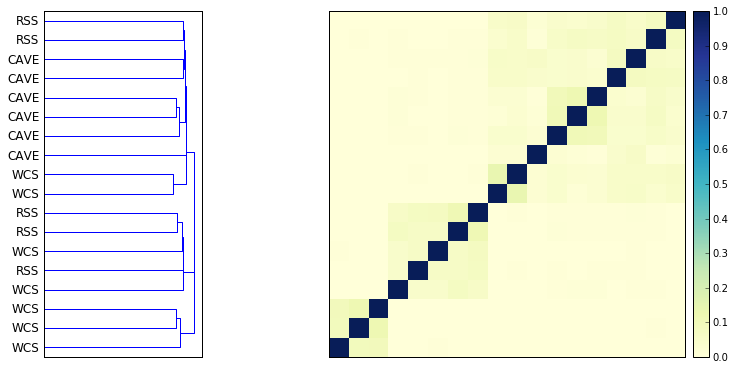

In [21]:
fig = plot_composite_matrix(D, metadata2)

pylab.savefig('sourmash-by-metadata2.pdf', bbox_inches='tight')

array([ 1.   ,  0.04 ,  0.041,  0.076,  0.033,  0.036,  0.068,  0.005,
        0.007,  0.005,  0.063,  0.   ,  0.   ,  0.001,  0.   ,  0.002,
        0.049,  0.048])

In [22]:
# WORK IN PROGRESS
import networkx as nx
import string

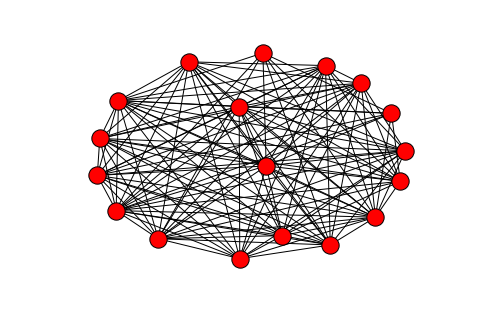

In [23]:
# Unweighted network plot
G = G=nx.from_numpy_matrix(D)
nx.draw(G)

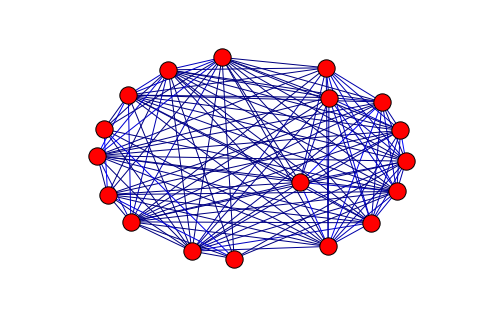

In [24]:
# Weighted network plot
nx.draw(G,edge_color = [ i[2]['weight'] for i in G.edges(data=True) ] )